# **Examples**
**Here are usage examples for each major module in plain text—just copy and paste into your own script.**

## Format Conversion (JSON ↔ XML ↔ CSV ↔ YAML)

In [28]:
from typing import List, Dict, Any
from webutils.converter.csv import CsvConverter
from webutils.converter.json import JsonConverter
from webutils.converter.xml import XmlConverter
from webutils.converter.yaml import YamlConverter

print("\n=== Format Conversion Example ===")

# 1. Initialize one converter instance per supported format
converters: Dict[str, Any] = {
    "json": JsonConverter(),
    "xml":  XmlConverter(),
    "csv":  CsvConverter(),
    "yaml": YamlConverter()
}

# 2. Test input strings for each format
#    - JSON and XML are nested structures
#    - YAML uses indentation for structure
#    - CSV uses ';' to separate list items in one column
inputs: Dict[str, str] = {
    "json": (
        '{ "user1": { "name": "Alice", "age": 30, "skills": [ "Python", "C++" ] },'
        '"user2": { "name": "Kirill", "age": 22, "skills": [ "Java", "C", "C++" ] } }'
    ),
    "xml": """
<root>
  <user1>
    <name>Alice</name>
    <age>30</age>
    <skills>
      <item>Python</item>
      <item>C++</item>
    </skills>
  </user1>
  <user2>
    <name>Kirill</name>
    <age>22</age>
    <skills>
      <item>Java</item>
      <item>C</item>
      <item>C++</item>
    </skills>
  </user2>
</root>
""",
    "yaml": """
user1:
  name: Alice
  age: 30
  skills:
    - Python
    - C++
user2:
  name: Kirill
  age: 22
  skills:
    - Java
    - C
    - C++
""",
    "csv": """id,name,age,skills
1,Alice,30,Python;C++
2,Kirill,22,Java;C;C++"""
}

def convert_and_display(source_format: str) -> None:
    """
    Parse data from source_format into an intermediate AST,
    then convert that AST into every other target format
    and print the results.
    """
    print(f"\n========== SOURCE FORMAT: {source_format.upper()} ==========")
    source_converter = converters[source_format]
    source_text = inputs[source_format]

    # 3. Show the raw input for clarity
    print(source_text)

    # 4. Attempt to parse into AST
    try:
        ast = source_converter.parse(source_text)
        print(f"\nParsed AST from {source_format.upper()}")
    except Exception as e:
        print(f"Error parsing {source_format}: {e}")
        return

    # 5. Convert the AST into each of the other formats
    for target_format, target_converter in converters.items():
        if target_format == source_format:
            # Skip converting back to the same format
            continue

        print(f"\n--- Converting AST to {target_format.upper()} ---")
        try:
            converted_text = target_converter.read(ast)
            print(converted_text)
        except Exception as e:
            print(f"Error converting to {target_format}: {e}")

# 6. Run the conversion for each format in turn
for fmt in converters.keys():
    convert_and_display(fmt)



========== SOURCE FORMAT: JSON ==========
{ "user1": { "name": "Alice", "age": 30, "skills": [ "Python", "C++" ] },               "user2": { "name": "Kirill", "age": 22, "skills": [ "Java", "C", "C++" ] } }

Parsed AST from JSON

--- Converting AST to XML ---
<?xml version="1.0" encoding="utf-8"?>
<root>
	<user1>
		<name>Alice</name>
		<age>30</age>
		<skills>Python</skills>
		<skills>C++</skills>
	</user1>
	<user2>
		<name>Kirill</name>
		<age>22</age>
		<skills>Java</skills>
		<skills>C</skills>
		<skills>C++</skills>
	</user2>
</root>

--- Converting AST to CSV ---
Error converting to csv: For CSV, a non-empty list of dicts is expected

--- Converting AST to YAML ---
user1:
  age: 30
  name: Alice
  skills:
  - Python
  - C++
user2:
  age: 22
  name: Kirill
  skills:
  - Java
  - C
  - C++


========== SOURCE FORMAT: XML ==========
<root>
  <user1>
    <name>Alice</name>
    <age>30</age>
    <skills>
      <item>Python</item>
      <item>C++</item>
    </skills>
  </user1>
  <user

## Email validator

In [29]:
from webutils.email_utils.email_validator import EmailValidator

print("\n=== Email Validator Example ===")

# 1. Loose validation
#    - checks for presence of '@'
#    - ensures local part is non-empty
#    - ensures domain contains at least one dot and doesn’t start with a dot
validator = EmailValidator(" user.name@example.com ")
print("Loose valid?:", validator.validate_loose())
# Expected output: True

# 2. Prepare test addresses for strict validation
#    - Local part must not start or end with a dot
#    - Only allowed characters in both local and domain parts
#    - Domain labels must not start with a hyphen
#    - Top-level domain (TLD) must be at least two letters
test_emails = [
    "john.doe@example.com",  # valid
    ".jane@example.com",     # invalid: local part starts with a dot
    "bob@example",           # invalid: missing TLD
    "alice@-example.com",    # invalid: domain starts with a hyphen
]

# 3. Strict validation loop
for email in test_emails:
    v = EmailValidator(email)
    is_valid = v.validate_strict()
    print(f"{email:25} strict valid?: {is_valid}")
    # Only True if the address matches the strict regex pattern



=== Email Validator Example ===
Loose valid?: True
john.doe@example.com      strict valid?: True
.jane@example.com         strict valid?: False
bob@example               strict valid?: False
alice@-example.com        strict valid?: False


## Simple email mailer

In [2]:
from webutils.email_utils import SimpleMailer

print("\n=== Simple Email Mailer Example ===")

# 1. Configure your SMTP and IMAP server parameters:
SMTP_SERVER = "smtp.example.com"  # hostname of your SMTP server
SMTP_PORT = 587                   # SMTP port (typically 587 for TLS)
IMAP_SERVER = "imap.example.com"  # hostname of your IMAP server
EMAIL = "me@example.com"          # your email address
PASSWORD = "secretpassword"       # your account password

# 2. Initialize the SimpleMailer client with these credentials
mailer = SimpleMailer(
    smtp_server=SMTP_SERVER,
    smtp_port=SMTP_PORT,
    imap_server=IMAP_SERVER,
    email_address=EMAIL,
    password=PASSWORD
)  # SimpleMailer handles both SMTP (send) and IMAP (fetch) connections

# --- Example 1: Sending an email ---
to_addr = "friend@example.org"          # recipient address
subject = "Test message"                # email subject line
body = "Hello!\nThis is a test email."  # plain-text message body

try:
    mailer.send_email(to_addr, subject, body)  # opens SMTP connection, sends the EmailMessage
    print("Email sent to", to_addr)
except Exception as e:
    print(f"Error sending email: {e}")

# --- Example 2: Fetching the latest emails ---
try:
    print("\n=== Latest Emails ===")
    latest_messages = mailer.fetch_latest_emails(mailbox="INBOX", limit=3)
    # fetch_latest_emails returns a list of strings formatted as:
    # "From: <sender>\nSubject: <subject>\n\n<body>"
    for msg in latest_messages:
        print("-----\n", msg)
except Exception as e:
    print(f"Error fetching latest emails: {e}")



=== Simple Email Mailer Example ===
Error sending email: Failed to send email: SMTP server address resolution failed: [Errno -2] Name or service not known

=== Latest Emails ===
Error fetching latest emails: Failed to fetch emails: IMAP server address resolution failed: [Errno -2] Name or service not known


## Ping
Root priviledges required.

In [30]:
from webutils.network.icmp.ping import Ping

print("\n=== Ping Example ===")

# 1. Initialize the Ping client
#    - destination: the host or IP address to ping
#    - packet_size: number of data bytes in each ICMP packet
#    - timeout:     seconds to wait for each reply before considering it lost
pinger = Ping(destination="1.1.1.1", packet_size=128, timeout=1)

# 2. Send the echo requests
#    - packet_count: total number of ICMP echo requests to send
response = pinger.start(packet_count=3)

# 3. Print summary statistics
print("Summary:")
print(f"  Sent:     {response.transmitted_package_count}")   # total packets transmitted
print(f"  Received: {response.received_package_count}")      # total replies received
print(f"  Loss %:   {response.packet_loss_rate:.1f}")        # percentage of packets lost
print(f"  Total time: {response.time:.0f}µs")                # total round-trip time in microseconds

# 4. If any replies were received, display min/avg/max round-trip times in milliseconds
if response.rtt_avg is not None:
    print(
        f"  RTT ms:   min={response.rtt_min:.2f}, "
        f"avg={response.rtt_avg:.2f}, "
        f"max={response.rtt_max:.2f}"
    )
else:
    # No replies → cannot compute round-trip statistics
    print("  No replies received, cannot calculate RTT.")



=== Ping Example ===
Ping 1.1.1.1 [1.1.1.1] with 128-byte packets
Reply from 1.1.1.1: seq=0 time=52.51 ms
Reply from 1.1.1.1: seq=1 time=52.77 ms
Reply from 1.1.1.1: seq=2 time=55.76 ms
Summary:
  Sent:     3
  Received: 3
  Loss %:   0.0
  Total time: 31631µs
  RTT ms:   min=52.51, avg=53.68, max=55.76


## Traceroute
Root priviledges required.

In [3]:
from webutils.network.icmp.traceroute import Traceroute

print("\n=== Traceroute Example ===")

# 1. Specify the target host (domain or IP)
host = "google.com"

# 2. Create a Traceroute instance
#    - host:       the destination to trace routes to
#    - packet_size: size in bytes of each ICMP packet payload
#    - timeout:    maximum wait time in seconds for each hop reply
t = Traceroute(destination=host, packet_size=64, timeout=1)

# 3. Start the traceroute; returns a list of hop objects
response = t.start()

# 4. Iterate through each hop and print its details
#    Each hop typically includes hop_number, address, and round-trip time
for hop in response:
    print(f"Hop {hop.hop_number:2d}: {hop.address} – RTT {hop.rtt} ms")



=== Traceroute Example ===
Traceroute to google.com [142.250.179.142], 30 hops max:
Error: [Errno 1] Operation not permitted


## DNS Lookup

In [4]:
from webutils.network.dns.dns_lookup import DnsLookup

print("\n=== DNS Lookup Example ===")

# 1. Specify the domain or IP address to resolve
host = "yandex.ru"

# 2. Create a DnsLookup instance
#    - domain: the target hostname or IP for the DNS query
#    - timeout: maximum wait time in seconds for the DNS response
dns = DnsLookup(domain=host, timeout=1)

# 3. Execute the lookup; returns a result object containing all answers
result = dns.start()

# 4. Loop through the list of returned addresses and print each one
for addr in result.addresses:
    print(f"Address: {addr}")



=== DNS Lookup Example ===
Address: 77.88.55.88
Address: 5.255.255.77
Address: 77.88.44.55


## Speedtest

In [16]:
from webutils.network.speedtest.speed_test import Speedtest

print("\n=== Speedtest Example ===")

# 1. Initialize the Speedtest client  
#    Creates a tester object that can perform download and upload measurements  
st = Speedtest()

# 2. Download test  
#    - download_url: URL of a large file used to measure download throughput  
download_url = "http://cachefly.cachefly.net/100mb.test"  
download_bps = st.test_download(download_url)  
print("Download speed:", st.format_speed(download_bps))  

# 3. Upload test  
#    - upload_host: target hostname for the upload test  
#    - upload_path: endpoint on that host accepting the uploaded data  
#    - duration: duration in seconds to stream data for the test  
upload_host = "filebin.net"  
upload_path = "/pytest/file"  
upload_bps = st.test_upload(upload_host, upload_path, duration=10)  
print("Upload speed:", st.format_speed(upload_bps))



=== Speedtest Example ===
Download speed: 92.61 Mbps
Upload speed: 56.87 Mbps


## QR Code Generation & Reading


=== QR Code Generation & Reading Example ===


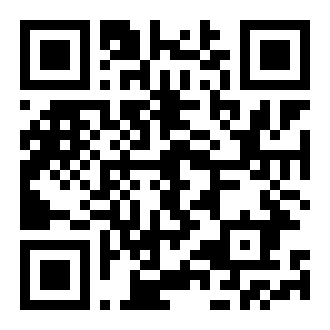

https://github.com/pukhovkirill/web-utils


In [1]:
from webutils.qr.qr_generator import QRCodeGenerator
from webutils.qr.qr_reader import QRCodeReader
from IPython.display import Image, display

print("\n=== QR Code Generation & Reading Example ===")

# 1. Initialize the QR code generator
generator = QRCodeGenerator()

# 2. The text or URL to encode into the QR code
text_to_encode = "https://github.com/pukhovkirill/web-utils"

# 3. Generate the QR code image and save it to "out.png"
#    - The default scale factor applies unless overridden
generator.generate(text_to_encode, output_path="out.png")
display(Image("out.png"))

# 4. Initialize the QR code reader
reader = QRCodeReader()

# 5. Read (decode) all QR codes found in the image file
decoded_codes = reader.read("out.png")

# 6. Print the last decoded string (useful if multiple codes are present)
print(decoded_codes[-1])


## Web Scraper

In [15]:
from webutils.parser import WebScraper, Writer
from typing import Any, Dict, List

print("\n=== Web Scraper Example ===")

# CustomWriter implements the Writer interface by printing scraped data to the console
class CustomWriter(Writer):
    def write(self, data: List[Dict[str, Any]], filename: str) -> None:
        """
        Write a list of dictionaries to the specified file.

        :param data: List of dicts representing the data to write.
        :param filename: The target filename.
        """
        # For now, just output the data to stdout instead of writing a file
        print(f"Writing data to {filename}:")
        for record in data:
            print(record)

# 1. Create a WebScraper instance, passing in our CustomWriter
scraper = WebScraper(CustomWriter())

# 2. Specify the page to scrape
url = "https://github.com/pukhovkirill/web-utils"

# 3. Fetch the HTML content from the URL
scraper.fetch(url)

# 4. Parse the fetched HTML:
#    - 'selector' locates each item container on the page
#    - 'mapping' tells the scraper which sub-elements to extract within each container
scraper.parse(
    selector=".Box-sc-g0xbh4-0",                    # CSS selector for each repo box
    mapping={"div": ".react-directory-truncate"}    # within each box, select <div> elements with this class
)

# 5. Save the parsed data:
#    This will invoke CustomWriter.write(data, "repos.json"),
#    printing each record and the filename.
scraper.save("repos.json")



=== Web Scraper Example ===
Writing data to repos.json:
{'div': []}
{'div': []}
{'div': []}
{'div': []}
{'div': []}
{'div': []}
{'div': []}
{'div': []}
{'div': []}
{'div': ['email_utils', 'email_utils', 'network', 'network', 'qr', 'qr', 'tests', 'tests', '.gitignore', '.gitignore', 'LICENSE', 'LICENSE', 'README.md', 'README.md', '__init__.py', '__init__.py', 'main.py', 'main.py', 'requirements.txt', 'requirements.txt']}
{'div': []}
{'div': []}
{'div': []}
{'div': []}
{'div': []}
{'div': []}
{'div': []}
{'div': []}
{'div': []}
{'div': []}
{'div': []}
{'div': []}
